# This dataset has funding information of the Indian startups from January 2015 to August 2017.

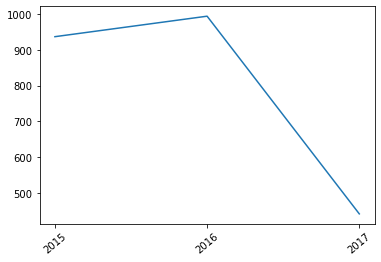

2015 936
2016 993
2017 443


In [2]:
'''               ##Number of Fundings##
Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.'''

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
startup = pd.read_csv("startup_funding.csv")
dict = {}
for i in startup['Date']:
    string = int(i[-4:])
    dict[string] = dict.get(string,0) + 1
xaxis = list(dict.keys())
yaxis = list(dict.values())
xaxis = xaxis[::-1]
yaxis = yaxis[::-1]
plt.plot(xaxis,yaxis)
plt.xticks(xaxis,rotation = 40)
plt.show()
for i in range(len(xaxis)):
    print(xaxis[i],yaxis[i])

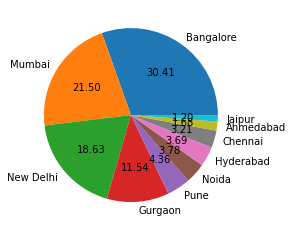

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [3]:
'''           ##Top Indian Cities##
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.'''

import matplotlib.pyplot as plt
import numpy as np
import csv
with open("startup_funding.csv") as file_obj :
    file_data = csv.DictReader(file_obj,skipinitialspace = True)
    city = []
    for i in file_data:
        city.append(i['CityLocation'])
    np_city = np.array(city)
    np_city = np_city[np_city != '']
    
    for i in range(len(np_city)):
        if 'bangalore' in np_city[i] :
            np_city[i] = 'Bangalore'
        if np_city[i] == 'Delhi':
            np_city[i] = 'New Delhi'
    
    for i in range(len(np_city)):
        np_city[i] = np_city[i].split('/')[0].strip()
    
    dict = {}
    for i in np_city:
        dict[i] = dict.get(i,0) + 1
    xaxis = []
    yaxis = []
    for i in dict:
        xaxis.append(i)
        yaxis.append(dict[i])
    
    np_xaxis = np.array(xaxis)
    np_yaxis = np.array(yaxis)
    
    np_xaxis = np_xaxis[np.argsort(np_yaxis)]
    np_yaxis = np.sort(np_yaxis)
    
    # for top 10 cities
    np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
    np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]
    
    plt.pie(np_yaxis,labels = np_xaxis,autopct = '%.2f')
    plt.show()
    
    for i in range(len(np_xaxis)):
        print(np_xaxis[i],np_yaxis[i])

In [7]:
'''       ##Top Industries##
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
'''


import pandas as pd
import numpy as np
startup = pd.read_csv('startup_funding.csv')
df = startup.copy()
# To overcome null values in AmountInUSD
df.AmountInUSD.loc[df['AmountInUSD'].isnull()] = '0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry = np.array(df.IndustryVertical)
np_amount = np.array(df.AmountInUSD)
# correct Ecommerce word
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'
# to convert 1,300,000 amount into 1300000
for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')

dict = {}
for i in range(len(np_amount)):
    dict[np_industry[i]] = dict.get(np_industry[i],0) + np_amount[i]

xaxis = []
yaxis = []
for i in dict:
    xaxis.append(i)
    yaxis.append(dict[i])

np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

# for descending order
np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)
# for top 5 industries
np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

for i in range(len(np_xaxis)):
    print(np_xaxis[i],'{:.2f}'.format(np_yaxis[i]*100/sum(np_yaxis)))





Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


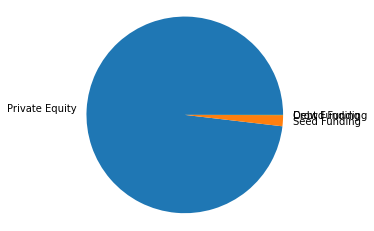

In [12]:
'''      #Investment Type ##
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
'''

def modified(amount):
    return int(amount.replace(',',''))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["InvestmentType"].fillna("",inplace = True)
df = df[df["InvestmentType"] != ""]
a = df["InvestmentType"]
b = df["AmountInUSD"]
d ={}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]
d['Seed Funding'] += d['SeedFunding']
d['Private Equity'] += d['PrivateEquity']
d['Crowd Funding'] += d['Crowd funding']
del d['SeedFunding']
del d['PrivateEquity']
del d['Crowd funding']
sum = 0
for i in d:
    sum += d[i]
for i in d:
    print(i,format(d[i]*100/sum,"0.2f"))
plt.pie(d.values(),labels = d.keys())
plt.axis("equal")
plt.show()

In [14]:
'''        ##Funding amount##
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.

'''
def modified(amount):
    return int(amount.replace(',',''))
def city(c):
    c = str(c)
    return c.split("/")[0].strip()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df["CityLocation"].fillna('',inplace = True)
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["CityLocation"] = df["CityLocation"].apply(city)
df["CityLocation"].replace("bangalore","Bangalore",inplace = True)
df["CityLocation"].replace("Delhi","New Delhi",inplace = True)
df = df[df["CityLocation"] != ""]
a = df["CityLocation"]
b = df["AmountInUSD"]
d = {}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]
    
d1 = sorted(d, key=d.get , reverse=True) 


c = 1
d2 = {}
for i in d1:
    if c == 11:
        break
    d2[i] = d2.get(i,0) + d[i]
    c += 1
sum = 0
for i in d2.values():
    sum += i
for i in d2:
    print(i,format(d2[i]*100/sum,"0.2f"))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [17]:
'''      ##Top Investor##
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.
'''

# Open and read data file as specified in the question
# Print the required output in given format
import csv
import numpy as np
with open('startup_funding.csv') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())
    dic={}
    for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    print(np_x[-1],np_y[-1])

Sequoia Capital 64


In [20]:
'''      ##Top startups##
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
'''

def modified(amount):
    return int(amount.replace(',',''))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df["AmountInUSD"].fillna('0',inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply(modified)
df["StartupName"].fillna("",inplace = True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
df = df[df["StartupName"] != ""]
a = df["StartupName"]
b = df["AmountInUSD"]
d = {}
for i in a.index:
    d[a[i]] = d.get(a[i],0) + b[i]
d1 = sorted(d, key=d.get , reverse=True) 
d1 = d1[:5]
for i in d1:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


List of locations where the most number of funding is done are :-
Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


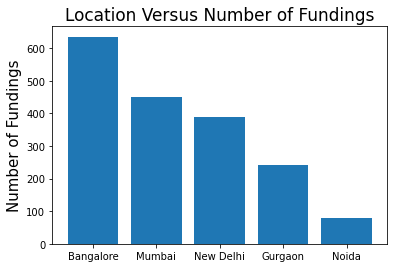

In [2]:
''' Q: Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance.
But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. 
As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi.
Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times.
Plot the bar graph between location and number of funding. 
Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also.
That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. 
Consider the startup if any one of the city lies in given locations.'''

import matplotlib.pyplot as plt
import numpy as np
import csv
with open("startup_funding.csv") as file_obj :
    file_data = csv.DictReader(file_obj,skipinitialspace = True)
    locations = ['Bangalore','Mumbai','New Delhi','Gurgaon','Noida']
    city = []
    for i in file_data:
        city.append(i['CityLocation'])
    np_city = np.array(city)
    np_city = np_city[np_city != '']
    
    for i in range(len(np_city)):
        if 'bangalore' in np_city[i] :
            np_city[i] = 'Bangalore'
        if np_city[i] == 'Delhi':
            np_city[i] = 'New Delhi'
        np_city[i] = np_city[i].split('/')[0].strip()
        
    dic = {}
    for i in np_city:
        if i in locations :
            dic[i] = dic.get(i,0) + 1
    xaxis = []
    yaxis = []
    for i in dic:
        xaxis.append(i)
        yaxis.append(dic[i])
    
    np_xaxis = np.array(xaxis)
    np_yaxis = np.array(yaxis)
    
    np_xaxis = np_xaxis[np.argsort(np_yaxis)]
    np_yaxis = np.sort(np_yaxis)
    
    np_xaxis = np_xaxis[::-1]
    np_yaxis = np_yaxis[::-1]
    print("List of locations where the most number of funding is done are :-")
    for i in range(len(np_xaxis)):
        print(np_xaxis[i],np_yaxis[i])

    
    plt.bar(np_xaxis,np_yaxis)
    plt.ylabel('Number of Fundings',fontsize=15)
    plt.title('Location Versus Number of Fundings',fontsize=17)
    plt.show()

Top 5 investors are :
Sequoia Capital 64
Accel Partners 51
Kalaari Capital 44
SAIF Partners 40
Indian Angel Network 40


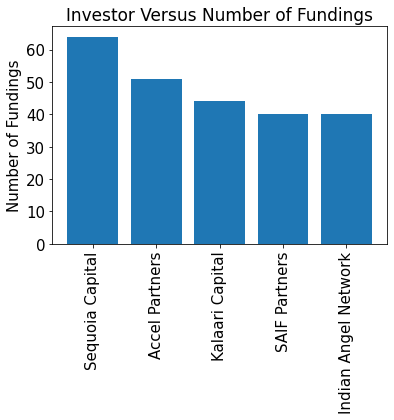

In [4]:
'''
Q: Even after trying for so many times, your friend’s startup could not find the investment. 
So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. 
Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. 
Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). 
In a startup, multiple investors might have invested. So consider each investor for that startup. 
Ignore undisclosed investors.'''

import numpy as np
import csv
with open("startup_funding.csv") as file_obj :
    file_data = csv.DictReader(file_obj,skipinitialspace = True)
    investors=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                if i!= '':
                    investors.append(i.strip())
    dic= {}
    for i in investors:
        dic[i] = dic.get(i,0) + 1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
    np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]
    print("Top 5 investors are :")
    for i in range(len(np_x)):
        print(np_x[i],np_y[i])
    plt.bar(np_x,np_y)
    plt.ylabel('Number of Fundings',fontsize=15)
    plt.title('Investor Versus Number of Fundings',fontsize=17)
    plt.yticks(fontsize=15)
    plt.xticks(rotation='vertical',fontsize=15)
    plt.show()

Top 5 Investors are:
Sequoia Capital - 49
Accel Partners - 47
Kalaari Capital - 41
Indian Angel Network - 40
Blume Ventures - 36


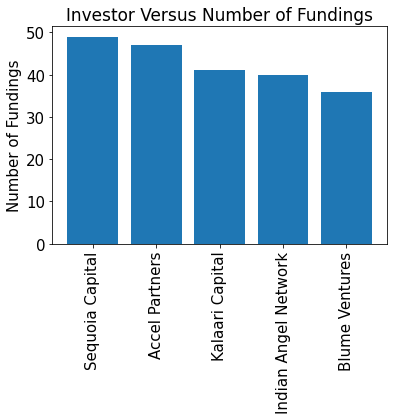

In [5]:
'''
Q: After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. 
So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. 
This list will be more helpful than your previous list in finding the investment for your friend startup. 
Find the top 5 investors who have invested maximum number of times in different companies.
That means, if one investor has invested multiple times in one startup, count one for that company. 
There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
'''
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
startup = pd.read_csv('startup_funding.csv')
df = startup.copy()
df.dropna(subset=['InvestorsName','StartupName'],inplace=True)
np_startups = np.array(df.StartupName)
for i in range(len(np_startups)):
    if 'Ola' in np_startups[i]:
        np_startups[i]='Ola'
    if 'Flipkart' in np_startups[i]:
        np_startups[i]='Flipkart'
    if 'Oyo' in np_startups[i]:
        np_startups[i]='Oyo'
    if 'Paytm' in np_startups[i]:
        np_startups[i]='Paytm'
        
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if invest != "":
            if invest in d:
                s=d[invest]
                s.add(np_startups[i])
                d[invest]=s
            else:
                d[invest]={np_startups[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:
Indian Angel Network - 33
Rajan Anandan - 23
LetsVenture - 16
Anupam Mittal - 16
Group of Angel Investors - 14


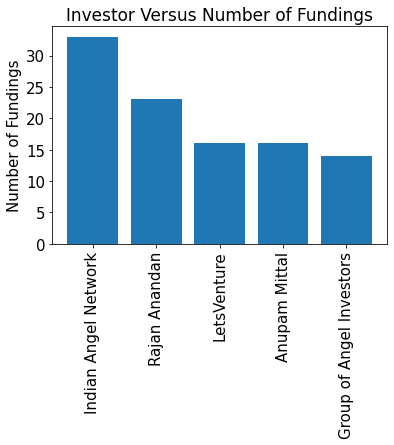

In [7]:
'''
Q: Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend.
So you went to your investor friend to understand the situation better and your investor friend explained
to you about the different Investment Types and their features. 
This new information will be helpful in finding the right investor.
Since your friend startup is at an early stage startup, the best-suited investment type would be -Seed Funding and Crowdfunding.
Find the top 5 investors who have invested in a different number of startups and their investment type 
is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding"
, "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. 
You can find this by printing unique values from this column. There are many errors in startup names. 
Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')]

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

Top 5 Investors for Investment type- Private Equity are:
Sequoia Capital - 45
Accel Partners - 43
Kalaari Capital - 35
Blume Ventures - 27
SAIF Partners - 24


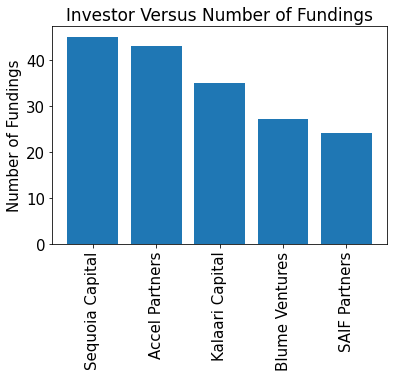

In [8]:
'''
Q: Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. 
Now your friend wants to expand his startup and he is looking for new investors for his startup.
Now you again come as a saviour to help your friend and want to create a list of probable new new investors. 
Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. 
Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity.
Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity.
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
Keep an eye for any spelling mistake. You can find this by printing unique values from this column. 
There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[df.InvestmentType=='Private Equity']

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Private Equity are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()